### Importing necessary packages and libraries

In [230]:
import matplotlib.pyplot as plt
import pandas as pd

import numpy as np
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split,cross_val_score, StratifiedKFold,KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.utils import shuffle
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split
from sklearn import metrics



from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2




### Importing the dataset

In [47]:

# Load dataset
df = pd.read_csv('oasis_longitudinal.csv')

# Inspect data
# ... YOUR CODE FOR TASK 1 ..
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


### Summary statistics of the dataset. 
Summary: This set consists of a longitudinal collection of 150 subjects aged 60 to 96. Each subject was scanned on two or more visits, separated by at least one year for a total of 373 imaging sessions. For each subject, 3 or 4 individual T1-weighted MRI scans obtained in single scan sessions are included. The subjects are all right-handed and include both men and women. 72 of the subjects were characterized as nondemented throughout the study. 64 of the included subjects were characterized as demented at the time of their initial visits and remained so for subsequent scans, including 51 individuals with mild to moderate Alzheimer’s disease. Another 14 subjects were characterized as nondemented at the time of their initial visit and were subsequently characterized as demented at a later visit.




In [48]:
# Print summary statistics
df_desc= df.describe()
print(df_desc)

print("\n")

# Print DataFrame information
df_info = df.info()
print(df_info)

print("\n")

print(df.tail(17))

            Visit     MR Delay         Age        EDUC         SES  \
count  373.000000   373.000000  373.000000  373.000000  354.000000   
mean     1.882038   595.104558   77.013405   14.597855    2.460452   
std      0.922843   635.485118    7.640957    2.876339    1.134005   
min      1.000000     0.000000   60.000000    6.000000    1.000000   
25%      1.000000     0.000000   71.000000   12.000000    2.000000   
50%      2.000000   552.000000   77.000000   15.000000    2.000000   
75%      2.000000   873.000000   82.000000   16.000000    3.000000   
max      5.000000  2639.000000   98.000000   23.000000    5.000000   

             MMSE         CDR         eTIV        nWBV         ASF  
count  371.000000  373.000000   373.000000  373.000000  373.000000  
mean    27.342318    0.290885  1488.128686    0.729568    1.195461  
std      3.683244    0.374557   176.139286    0.037135    0.138092  
min      4.000000    0.000000  1106.000000    0.644000    0.876000  
25%     27.000000    0.0

### Preprocessing the data

In [49]:
#fill null value with their column mean and median
df["SES"].fillna(df["SES"].median(), inplace=True)
df["MMSE"].fillna(df["MMSE"].mean(), inplace=True)
print(df.isnull().sum())

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64


<AxesSubplot:xlabel='Group', ylabel='count'>

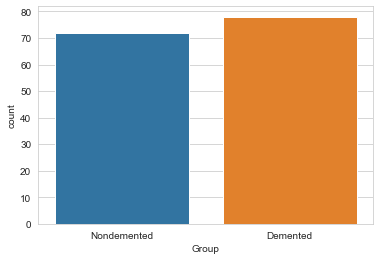

In [50]:
#see how many people have Alzheimer
#same person visits two or more time so only take the single visit data
sns.set_style("whitegrid")
ex_df = df.loc[df['Visit'] == 1]
sns.countplot(x='Group', data=ex_df)


#We have three groups so convert Converted Group Into Demented

ex_df['Group'] = ex_df['Group'].replace(['Converted'], ['Demented'])
df['Group'] = df['Group'].replace(['Converted'], ['Demented'])
sns.countplot(x='Group', data=ex_df)

### Exploratory Data Analysis

              M   F
Demented     40  38
Nondemented  22  50


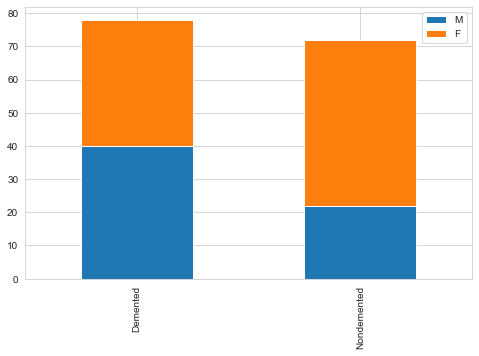

In [51]:
Demented = ex_df[ex_df['Group']=='Demented']['M/F'].value_counts()
Nondemented = ex_df[ex_df['Group']=='Nondemented']['M/F'].value_counts()
df_bar = pd.DataFrame([Demented,Nondemented])
df_bar.index = ['Demented','Nondemented']
df_bar.plot(kind='bar',stacked=True, figsize=(8,5))
print(df_bar)

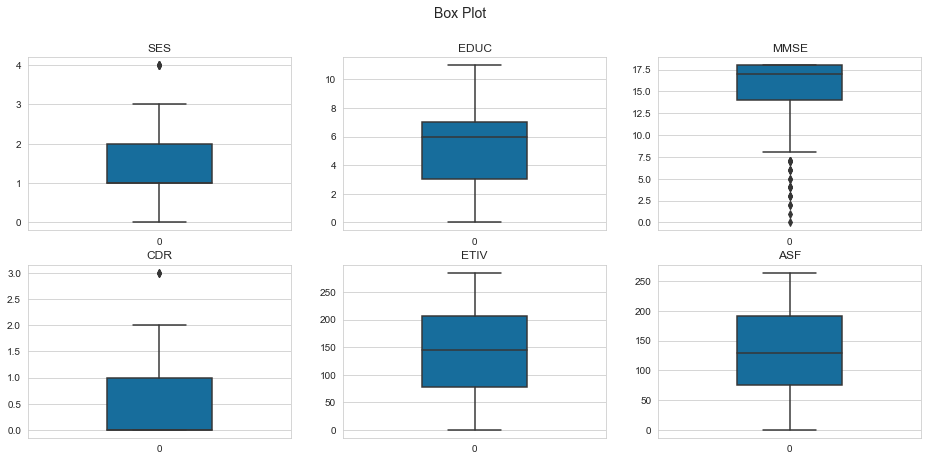

In [250]:
#boxplots which shows the IQR(Interquartile Range )
fig, axes = plt.subplots(2,3,figsize = (16,7))
fig.suptitle("Box Plot",fontsize=14)
sns.set_style("whitegrid")
l=['SES','EDUC','MMSE','CDR','ETIV','ASF']
for i, ax in enumerate(axes.flat):
    ax.set_title(l[i])


sns.boxplot(data=df['SES'], orient="v",width=0.4, palette="colorblind",ax = axes[0][0]);
sns.boxplot(data=df['EDUC'], orient="v",width=0.4, palette="colorblind",ax = axes[0][1]);
sns.boxplot(data=df['MMSE'], orient="v",width=0.4, palette="colorblind",ax = axes[0][2]);
sns.boxplot(data=df['CDR'], orient="v",width=0.4, palette="colorblind",ax = axes[1][0]);
sns.boxplot(data=df['eTIV'], orient="v",width=0.4, palette="colorblind",ax = axes[1][1]);
sns.boxplot(data=df['ASF'], orient="v",width=0.4, palette="colorblind",ax = axes[1][2]);
#xlabel("Time");


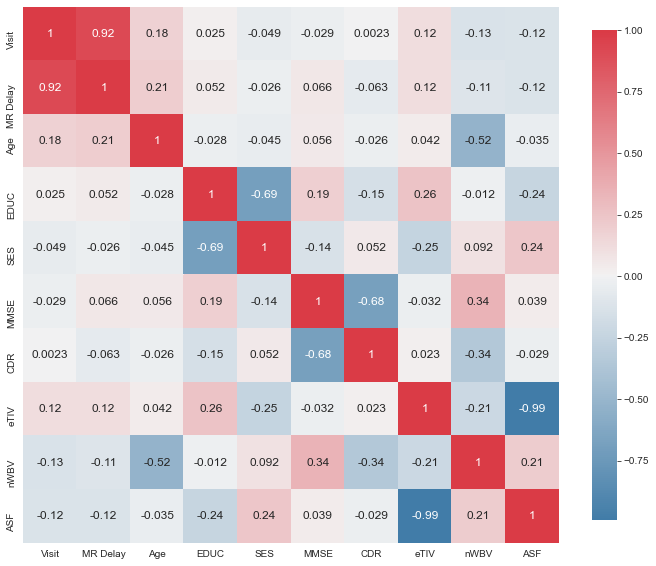

In [53]:
def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 240 , 10 , as_cmap = True )
    _ = sns.heatmap(corr,cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = { 'fontsize' : 12 })
plot_correlation_map(df)

### Selecting important features that are most crucial in detecting early Alzheimer

In [253]:
# Instantiate LabelEncoder
le=LabelEncoder()
# Iterate over all the values of each column and extract their dtypes
for col in ex_df.columns.to_numpy():
    # Compare if the dtype is object
    if ex_df[col].dtypes=='object':
    # Use LabelEncoder to do the numeric transformation
        ex_df[col]=le.fit(ex_df[col])        
print(ex_df)

     Subject ID  MRI ID  Group  Visit  MR Delay  M/F  Hand  Age  EDUC  SES  \
0             0       0      1      1         0    1     0   87    14  2.0   
2             1       1      0      1         0    1     0   75    12  2.0   
5             2       2      1      1         0    0     0   88    18  3.0   
7             3       3      1      1         0    1     0   80    12  4.0   
10            4       4      0      1         0    1     0   71    16  2.0   
..          ...     ...    ...    ...       ...  ...   ...  ...   ...  ...   
359         145     145      0      1         0    1     0   73    12  2.0   
361         146     146      1      1         0    0     0   66    13  2.0   
365         147     147      0      1         0    0     0   72    16  3.0   
367         148     148      0      1         0    1     0   80    16  1.0   
370         149     149      1      1         0    0     0   61    13  2.0   

     MMSE  CDR  eTIV   nWBV    ASF  
0    27.0  0.0  1987  0.69

In [254]:
X = ex_df.iloc[:,5:15]
y = ex_df.iloc[:,2]
print(X)

     M/F  Hand  Age  EDUC  SES  MMSE  CDR  eTIV   nWBV    ASF
0      1     0   87    14  2.0  27.0  0.0  1987  0.696  0.883
2      1     0   75    12  2.0  23.0  0.5  1678  0.736  1.046
5      0     0   88    18  3.0  28.0  0.0  1215  0.710  1.444
7      1     0   80    12  4.0  28.0  0.0  1689  0.712  1.039
10     1     0   71    16  2.0  28.0  0.5  1357  0.748  1.293
..   ...   ...  ...   ...  ...   ...  ...   ...    ...    ...
359    1     0   73    12  2.0  23.0  0.5  1661  0.698  1.056
361    0     0   66    13  2.0  30.0  0.0  1495  0.746  1.174
365    0     0   72    16  3.0  24.0  0.5  1354  0.733  1.296
367    1     0   80    16  1.0  28.0  0.5  1704  0.711  1.030
370    0     0   61    13  2.0  30.0  0.0  1319  0.801  1.331

[150 rows x 10 columns]


### 1. K-best 

In [256]:
bestfeatures = SelectKBest(score_func=chi2, k=8)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

  Features      Score
6      CDR  36.000000
5     MMSE  13.421167
0      M/F   3.891232
3     EDUC   3.821454
7     eTIV   3.034464
4      SES   0.140333
8     nWBV   0.019006
9      ASF   0.001072
2      Age   0.000476


### 2. Extra Tress Classifies

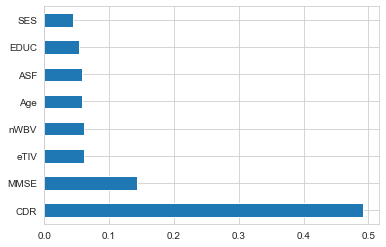

In [85]:

model = ExtraTreesClassifier()
model.fit(X,y)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(8).plot(kind='barh')
plt.show()

### 3. Forward Selection

In [257]:
param_grid = {'n_neighbors': np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv=GridSearchCV(knn,param_grid,cv=5)
sfs = SequentialFeatureSelector(knn_cv,n_features_to_select=8)
sfs.fit(X, y)

print(sfs.get_support(indices=True))


[0 1 3 4 5 6 8 9]


### From all the three methods we observe that the following features are of the highest importance-
1. CDR	Clinical Dementia Rating
2. MMSE	Mini Mental State Examination
3. EDUC	Years of Education
4. eTIV	Estimated Total Intracranial Volume
5. SES	Socioeconomic Status
6. nWBV	Normalize Whole Brain Volume
7. ASF	Atlas Scaling Factor
8. M/F Male/Female

No garbage in No garbage out. So, we will implement the models using these 7 features only. 

In [258]:
feature_col_names = ["M/F", "EDUC", "SES", "MMSE", "eTIV", "nWBV", "ASF", 'CDR']
predicted_class_names = ['Group']

Xf = ex_df[feature_col_names].values
yf = ex_df[predicted_class_names].values

Xf_train, Xf_test, yf_train, yf_test = train_test_split(Xf, yf, test_size=0.30, random_state=42)

In [259]:
# Spot-Check Algorithms
models = []
models.append(( 'LR' , LogisticRegression()))
models.append(( 'LDA' , LinearDiscriminantAnalysis()))
models.append(( 'KNN' , KNeighborsClassifier()))
models.append(( 'DT' , BaggingClassifier()))
models.append(( 'NB' , GaussianNB()))
models.append(( 'SVM' , SVC()))
models.append(( 'RF' , RandomForestClassifier()))
models.append(( 'NN' , MLPClassifier( activation='tanh', solver='lbfgs', max_iter=50000)))

# Test options and evaluation metric
num_folds = 10
num_instances = len(X_train)
seed = 7 
scoring =  'accuracy'

# Test options and evaluation metric
num_instances = len(X_train)
seed = 7 
scoring =  'accuracy'
results = []
names = []
kfold = KFold()
display("Model:  Accuracy  Std")
for name, model in models:
 cv_results = cross_val_score(model, Xf_train, yf_train, cv=kfold, scoring=scoring)
 results.append(cv_results)
 names.append(name)
 msg = "%s:\t%.2f%s\t(%f)" % (name, cv_results.mean()*100,"%", cv_results.std())
 print(msg)

'Model:  Accuracy  Std'

LR:	89.52%	(0.063174)
LDA:	92.38%	(0.048562)
KNN:	45.71%	(0.048562)
DT:	87.62%	(0.048562)


NB:	92.38%	(0.048562)
SVM:	56.19%	(0.081927)


RF:	90.48%	(0.052164)
NN:	56.19%	(0.081927)


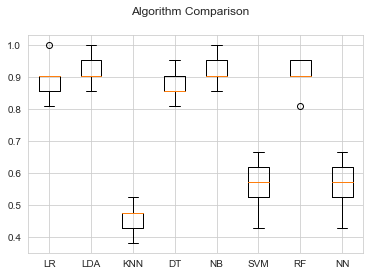

In [260]:
fig = plt.figure()
fig.suptitle( 'Algorithm Comparison' )
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Scaling the feature to see if the their is change in the accuracy of the models

In [261]:
# Standardize the dataset
pipelines = []
pipelines.append(( 'ScaledLR' , Pipeline([( 'Scaler' , StandardScaler()),( 'LR' ,
    LogisticRegression())])))
pipelines.append(( 'ScaledLDA' , Pipeline([( 'Scaler' , StandardScaler()),( 'LDA' ,
    LinearDiscriminantAnalysis())])))
pipelines.append(( 'ScaledKNN' , Pipeline([( 'Scaler' , StandardScaler()),( 'KNN' ,
    KNeighborsClassifier())])))

pipelines.append(( 'ScaledNB' , Pipeline([( 'Scaler' , StandardScaler()),( 'NB' ,
    GaussianNB())])))
pipelines.append(( 'ScaledSVM' , Pipeline([( 'Scaler' , StandardScaler()),( 'SVM' , SVC())])))
pipelines.append(( 'ScaledNN' , Pipeline([( 'Scaler' , StandardScaler()),( 'NN' ,MLPClassifier( activation='tanh', solver='lbfgs', max_iter=50000))])))

pipelines.append(( 'ScaledDT' , Pipeline([( 'Scaler' , StandardScaler()),( 'DT' , BaggingClassifier())])))
pipelines.append(( 'ScaledRF' , Pipeline([( 'Scaler' , StandardScaler()),( 'RF' ,  RandomForestClassifier())])))
results = []
names = []
display("Model    Accuracy    Std")
for name, model in pipelines:
  kfold = KFold()
  cv_results = cross_val_score(model, Xf_train, yf_train, cv=kfold,
      scoring=scoring)
  results.append(cv_results)
  names.append(name)
  
  msg = "%s:\t%.2f%s\t(%f)" % (name, cv_results.mean()*100,"%", cv_results.std())
  print(msg)

'Model    Accuracy    Std'

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

ScaledLR:	92.38%	(0.048562)
ScaledLDA:	92.38%	(0.048562)
ScaledKNN:	84.76%	(0.046657)
ScaledNB:	92.38%	(0.048562)
ScaledSVM:	92.38%	(0.048562)


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

ScaledNN:	83.81%	(0.077372)
ScaledDT:	86.67%	(0.063174)


/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


ScaledRF:	89.52%	(0.035635)


/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


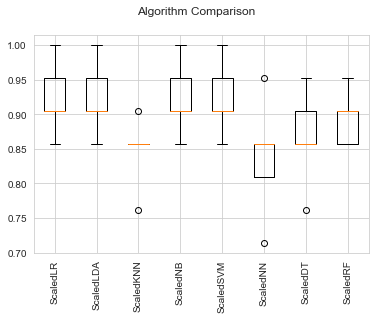

In [262]:
fig = plt.figure()
fig.suptitle( 'Algorithm Comparison' )
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation ='90')
plt.show()

### Models that perform good after scaling:
### LR, LDA, NB, SVM, RF
##### Lets tune the hyperparameters for these individually. The NB, LR, LDA, SVM have the same level of accuracy, so we only try to tune the parameters of SVM and LR.


In [263]:
#1. SVM
#Make Support Vector Classifier Pipeline
pipe_svc = Pipeline([( 'scl' , StandardScaler()),( 'clf' , SVC())])

#Fit Pipeline to training Data
pipe_svc.fit(Xf_train, yf_train)

#print('--> Fitted Pipeline to training Data')

scores = cross_val_score(estimator=pipe_svc, X=Xf_train, y=yf_train)
print('--> Model Training Accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

#Tune Hyperparameters
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [{'clf__C': param_range,'clf__kernel': ['linear']},
              {'clf__C': param_range,'clf__gamma': param_range,
               'clf__kernel': ['rbf']}]
gs_svc = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=10,
                  n_jobs=1)
gs_svc = gs_svc.fit(Xf_train, yf_train)
yf_pred = gs_svc.predict(Xf_test)

print(confusion_matrix(yf_test, yf_pred))
print('--> Tuned Parameters Best Score: ',gs_svc.best_score_)
print('--> Best Parameters: \n',gs_svc.best_params_)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

--> Model Training Accuracy: 0.924 +/- 0.038


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

[[14  5]
 [ 0 26]]
--> Tuned Parameters Best Score:  0.9236363636363636
--> Best Parameters: 
 {'clf__C': 0.1, 'clf__kernel': 'linear'}


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [265]:
#2. LR
# Setup the hyperparameter grid

pipe_lr = Pipeline([( 'Scaler' , StandardScaler()),( 'LR' ,
    LogisticRegression())])
            
#Fit Pipeline to training Data
pipe_lr.fit(Xf_train, yf_train) 

scores = cross_val_score(estimator=pipe_lr, 
                         X=Xf_train, 
                         y=yf_train, 
                         cv=10,
                         n_jobs=1)
print('--> Model Training Accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

#Tune Hyperparameters
param_grid={'LR__solver'  :['newton-cg', 'lbfgs', 'liblinear'],'LR__penalty':['l2'],'LR__C' : [100, 10, 1.0, 0.1, 0.01]}

# instantiate the grid
gs_lr = GridSearchCV(pipe_lr, 
                    param_grid=param_grid, 
                    cv=10, 
                    scoring='accuracy')
gs_lr = grid.fit(Xf_train, yf_train)
yf_pred = grid.predict(Xf_test)
print(confusion_matrix(yf_test, yf_pred))
print('--> Tuned Parameters Best Score: ',grid.best_score_)
print('--> Best Parameters: \n',grid.best_params_)





/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

--> Model Training Accuracy: 0.924 +/- 0.072


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

[[14  5]
 [ 0 26]]
--> Tuned Parameters Best Score:  0.9236363636363636
--> Best Parameters: 
 {'LR__C': 1.0, 'LR__penalty': 'l2', 'LR__solver': 'newton-cg'}


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

In [266]:
#Make Support Vector Classifier Pipeline
pipe_rf = Pipeline([( 'scl' , StandardScaler()),( 'clf' , RandomForestClassifier())])

#Fit Pipeline to training Data
pipe_rf.fit(Xf_train, yf_train)

#print('--> Fitted Pipeline to training Data')

scores = cross_val_score(estimator=pipe_rf, X=Xf_train, y=yf_train)
print('--> Model Training Accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

#Tune Hyperparameters

param_grid = [{'clf__n_estimators' : [10, 100, 1000],
'clf__max_features' : ['sqrt', 'log2']}]
gs_rf = GridSearchCV(estimator=pipe_rf,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=10,
                  n_jobs=1)
gs_rf = gs_rf.fit(Xf_train, yf_train)
yf_pred = gs_rf.predict(Xf_test)

print(confusion_matrix(yf_test, yf_pred))
print('--> Tuned Parameters Best Score: ',gs_rf.best_score_)
print('--> Best Parameters: \n',gs_rf.best_params_)


/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Plea

--> Model Training Accuracy: 0.914 +/- 0.063


/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Plea

/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Plea

/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[[14  5]
 [ 2 24]]
--> Tuned Parameters Best Score:  0.9145454545454547
--> Best Parameters: 
 {'clf__max_features': 'sqrt', 'clf__n_estimators': 1000}


### Apply the hyperparametered model on the test set and select the best model

In [267]:
#function of accuracy
total_accuracy = {}
def accuracy(model):
    pred = model.predict(Xf_test)
    accu = metrics.accuracy_score(yf_test,pred)
    print("\nAcuuracy Of the Model: ",accu,"\n\n")
    total_accuracy[str((str(model)))] = accu

In [268]:
#function for ploting confusion metrix
def plot_confusion_metrix(y_test,model_test):
    cm = metrics.confusion_matrix(y_test, model_test)
    plt.figure(1)
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.summer)
    classNames = ['Nondemented','Demented']
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

Pipeline(steps=[('scl', StandardScaler()),
                ('clf', SVC(C=0.1, kernel='linear'))])
--> Final Model Training Accuracy: 0.924 +/- 0.072
--> Final Accuracy on Test set: 0.88889

Acuuracy Of the Model:  0.8888888888888888 




/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

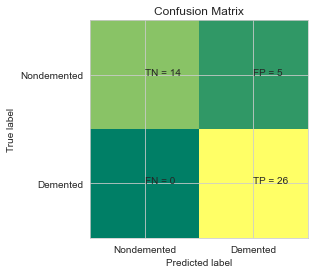

In [269]:
#1. SVM with best parameter on test set
clf_svc = gs_svc.best_estimator_

#Get Final Scores
clf_svc.fit(Xf_train, yf_train)
scores = cross_val_score(estimator=clf_svc,
                         X=Xf_train,
                         y=yf_train,
                         cv=10,
                         n_jobs=1)

print('--> Final Model Training Accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

print('--> Final Accuracy on Test set: %.5f' % clf_svc.score(Xf_test,yf_test))
accuracy(clf_svc)
plot_confusion_metrix(yf_test,clf_svc.predict(Xf_test))

--> Final Model Training Accuracy: 0.924 +/- 0.072
--> Final Accuracy on Test set: 0.88889

Acuuracy Of the Model:  0.8888888888888888 




/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

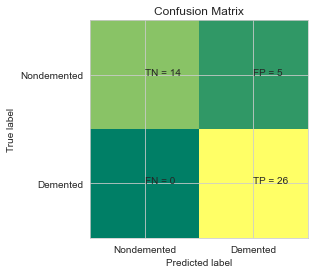

In [275]:
#2. LR: Using best parameters on test set

clf_lr = grid.best_estimator_
#Get Final Scores
clf_lr.fit(Xf_train, yf_train)
scores = cross_val_score(estimator=clf_lr,
                         X=Xf_train,
                         y=yf_train,
                         cv=10,
                         n_jobs=1)


print('--> Final Model Training Accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

print('--> Final Accuracy on Test set: %.5f' % clf_lr.score(Xf_test,yf_test))
accuracy(clf_lr)
plot_confusion_metrix(yf_test,clf_lr.predict(Xf_test))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Plea

--> Final Model Training Accuracy: 0.905 +/- 0.109
--> Final Accuracy on Test set: 0.84444

Acuuracy Of the Model:  0.8444444444444444 




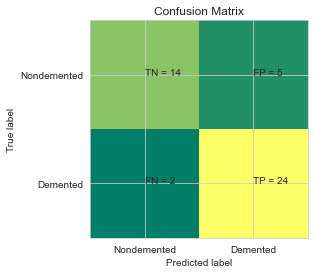

In [271]:
#3. RF: using the best parameters on the test set
clf_rf = gs_rf.best_estimator_

#Get Final Scores
clf_rf.fit(Xf_train, yf_train)
scores = cross_val_score(estimator=clf_rf,
                         X=Xf_train,
                         y=yf_train,
                         cv=10,
                         n_jobs=1)

print('--> Final Model Training Accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

print('--> Final Accuracy on Test set: %.5f' % clf_rf.score(Xf_test,yf_test))
accuracy(clf_rf)
plot_confusion_metrix(yf_test,clf_rf.predict(Xf_test))

### Model comparison

Text(0, 0.5, 'Accuracy')

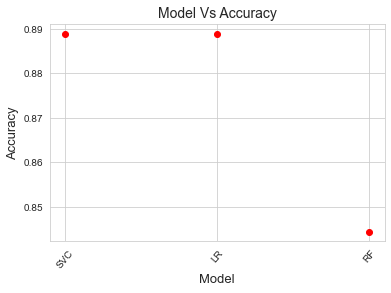

In [276]:
data = total_accuracy.values()
labels = ['SVC','LR','RF']
plt.plot([i for i, e in enumerate(data)], data, 'ro'); plt.xticks([i for i, e in enumerate(labels)], [l[0:16] for l in labels])
plt.title("Model Vs Accuracy",fontsize = 14)
plt.xlabel('Model',fontsize = 13)
plt.xticks(rotation = 50)
plt.ylabel('Accuracy',fontsize = 13)

## Observation:
1. We found that SVC and LR both would be best models for predicting the Alzheimers.
2. The CDR (Clinical Dementia Rating) and MMSE	(Mini Mental State Examination) are very good parameters for detecting dementia at an early stage. So the clinician can improve improve these testing and the questionnaire. This would also help in improving the model accuracy.
3. The SVC and LR models give an accuracy of 88% on the testing set with zero false negative values, which is a remarkable as it would not detect any patient with Demnetia as non Demented. 
4. The cons of the model is that the data set is small and only for the patients of the same age group. We could improve our model by adding more features with varied range of ages.
